In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mario\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mario\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mario\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [4]:
import xlrd
import pandas as pd
import numpy as np
import scipy
import openpyxl

from pyproj import Proj, transform

import warnings
warnings.filterwarnings('ignore')

In [123]:
excel_file = pd.ExcelFile("Gemeinde inkl. Charakter & DemoKpi.xlsx")
gemeinden = pd.read_excel(excel_file)

In [94]:
gemeinden.head(10)

,Unnamed: 0,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,...,LV95_E,LV95_N,WGS84_E,WGS84_N,Altenquotient,Jugendquotient,Abhaengigenquotient,Region,Agglomerationen 2012,Charakter
0,0,Aeugst am Albis,1,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,...,2679435.817,1235653.185,47.267004,8.488313,0.289773,0.318182,0.607955,Zürich,261.0,Agglomeration
1,1,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,...,2675104.519,1237890.488,47.287633,8.431459,0.294583,0.327007,0.621590,Zürich,261.0,Agglomeration
2,2,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,...,2676439.358,1236966.371,47.279169,8.448945,0.294583,0.327007,0.621590,Zürich,261.0,Agglomeration
3,3,Bonstetten,3,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,...,2677798.571,1241024.843,47.315510,8.467611,0.276245,0.395021,0.671266,Zürich,261.0,Agglomeration
4,4,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,...,2682996.334,1232961.650,47.242360,8.534860,0.300802,0.370766,0.671569,Zürich,261.0,Agglomeration
5,5,Ebertswil,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,...,2684168.704,1231176.639,47.226157,8.550009,0.300802,0.370766,0.671569,Zürich,261.0,Agglomeration
6,6,Hedingen,5,3778,10.791789,578.560490,16.410799,21.625199,61.646374,16.728428,...,2676518.511,1239054.300,47.297938,8.450347,0.271361,0.350794,0.622155,Zürich,261.0,Agglomeration
7,7,Kappel am Albis,6,1221,33.006536,154.166667,17.526618,24.979525,61.179361,13.841114,...,2682261.569,1231284.424,47.227367,8.524850,0.226238,0.408300,0.634538,Zürich,0.0,Land
8,8,Knonau,7,2378,32.111111,367.542504,18.292683,24.348192,60.975610,14.676198,...,2677402.530,1230821.895,47.223794,8.460617,0.240690,0.399310,0.640000,Zürich,1711.0,Agglomeration
9,9,Maschwanden,8,645,4.707792,137.526652,12.868217,22.015504,59.534884,18.449612,...,2674785.638,1232061.104,47.235241,8.426274,0.309896,0.369792,0.679688,Zürich,261.0,Agglomeration


In [95]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt

## Schweizer Gemeinden: Deskriptive Statistik
# Bevölkerung (Einwohner)

In [124]:
gemeinden.drop_duplicates(subset=['Gemeindecode'], inplace=True) # Komisch nach BFS sollten es  2172 Gemeinden für 1.1.2021 respektive 2148 Gemeinden für 1.1.2022 sein. Im Orginaldatensatz sind 2172 - wo gingen diese verloren???? Es fehlen über 300000 Einwohner
gemeinden['Einwohner'].describe()

count      1983.000000
mean       4179.861826
std       13415.863920
min          33.000000
25%         824.500000
50%        1717.000000
75%        4026.000000
max      420217.000000
Name: Einwohner, dtype: float64

In [125]:
gemeinden['Einwohner'].sum() 

8288666

In [126]:
gemeinden['Einwohner'].median() 

1717.0

Text(0.5, 1.0, 'Verteilung log10(Einwohner)')

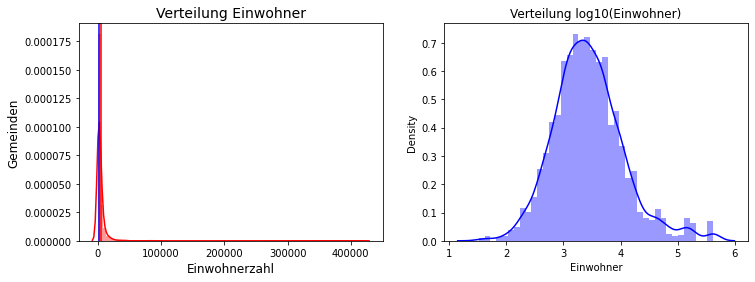

In [127]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(gemeinden['Einwohner'],bins=100,color='r',ax=ax)
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Einwohnerzahl", size=12)
plt.ylabel("Gemeinden", size=12)
plt.axvline(x=gemeinden['Einwohner'].median(), color='blue')
plt.axvline(x=gemeinden['Einwohner'].mean(),
            color='red')


ax=f.add_subplot(122)
sns.distplot(np.log10(df['Einwohner']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Einwohner)')

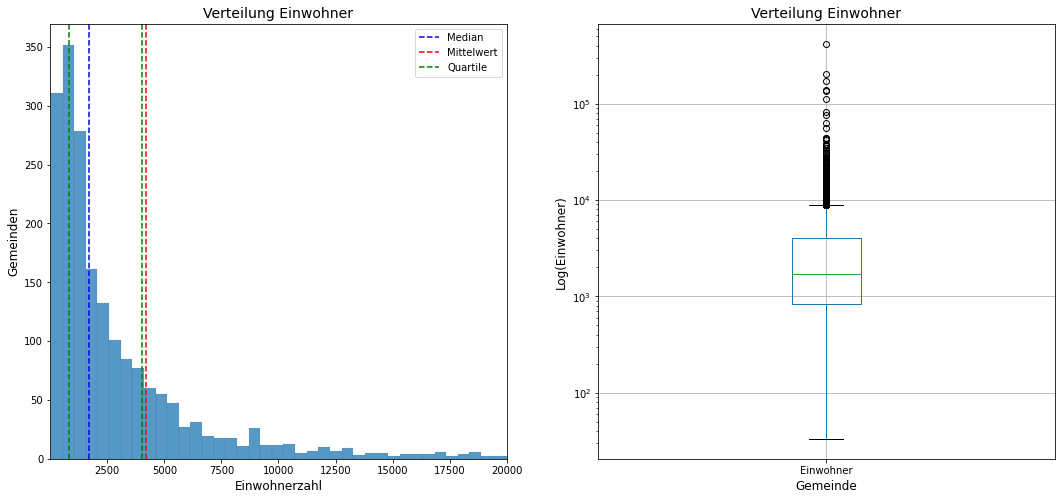

In [128]:
f= plt.figure(figsize=(18,8))
ax = f.add_subplot(121)
sns.histplot(gemeinden['Einwohner'], legend=True)
ax.set_xlim(1,20000)
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Einwohnerzahl", size=12)
plt.ylabel("Gemeinden", size=12)
plt.axvline(x=gemeinden['Einwohner'].median(), color='blue', linestyle='dashed', label="Median")
plt.axvline(x=gemeinden['Einwohner'].mean(),
            color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(x=gemeinden['Einwohner'].quantile(0.25), color='green', linestyle='dashed', label="Q25%")
plt.axvline(x=gemeinden['Einwohner'].quantile(0.75), color='green', linestyle='dashed', label="Q75%")
labels = ["Median", "Mittelwert", "Quartile"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[0:], labels = labels)

ax = f.add_subplot(122)
boxplot = gemeinden.boxplot(column=['Einwohner'])
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Gemeinde", size=12)
plt.ylabel("Log(Einwohner)", size=12)#, 'Altenquotient', 'Jugendquotient'
plt.yscale('log')

In [129]:
def find_outliers_IQR_multivariant_df(df, name_of_column):

   q1=df[name_of_column].quantile(0.25)

   q3=df[name_of_column].quantile(0.75)

   IQR=q3-q1

   outliers = df[((df[name_of_column]<(q1-1.5*IQR)) | (df[name_of_column]>(q3+1.5*IQR)))]

   print('WhyskerMin: %4d' %(q1-1.5*IQR))
   print('WhyskerMin: %5d' %(q3+1.5*IQR))
   return outliers

In [130]:
gemeinden[gemeinden['Einwohner'] > 50000].sort_values(by='Einwohner')

,Unnamed: 0,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,...,LV95_E,LV95_N,WGS84_E,WGS84_N,Altenquotient,Jugendquotient,Abhaengigenquotient,Region,Agglomerationen 2012,Charakter
342,342,Biel/Bienne,371,55602,8.591293,2623.973572,33.973598,19.414769,62.366462,18.218769,...,2.585367e+06,1.221241e+06,47.141984,7.245725,0.292124,0.311301,0.603426,EspaceMittelland,371.0,Stadt
2324,2324,Lugano,5192,62615,3.946014,824.641117,38.438074,17.334505,60.308233,22.357263,...,2.716806e+06,1.095994e+06,46.005404,8.946560,0.370717,0.287432,0.658148,Tessin,5192.0,Stadt
1442,1442,St. Gallen,3203,76090,4.291451,1932.199086,31.491655,18.100933,64.146406,17.752661,...,2.745133e+06,1.254315e+06,47.423635,9.362229,0.276752,0.282182,0.558934,Ostschweiz,3203.0,Stadt
761,761,Luzern,1061,82257,6.150392,2826.701031,24.407649,16.238132,64.333735,19.428134,...,2.665224e+06,1.211360e+06,47.050065,8.297014,0.301990,0.252405,0.554394,Zentralschweiz,1061.0,Stadt
184,184,Winterthur,230,113173,11.711810,1662.597326,24.535004,19.974729,63.804088,16.221183,...,2.697279e+06,1.260896e+06,47.491622,8.729549,0.254234,0.313063,0.567298,Zürich,230.0,Stadt
297,297,Bern,351,134591,8.208649,2607.342115,24.862732,16.713599,66.067568,17.218833,...,2.601018e+06,1.203269e+06,46.980487,7.452011,0.260625,0.252977,0.513602,EspaceMittelland,351.0,Stadt
2561,2561,Lausanne 25,5586,139408,9.065021,3368.970517,42.387811,19.380523,65.920894,14.698583,...,2.542095e+06,1.157052e+06,46.562237,6.683444,0.222973,0.293997,0.516970,Genferseeregion,5586.0,Stadt
1273,1273,Basel,2701,173232,6.136653,7263.396226,37.955459,16.893530,64.076499,19.029971,...,2.611309e+06,1.267306e+06,47.556371,7.588870,0.296988,0.263646,0.560635,Nordwestschweiz,2701.0,Stadt
3040,3040,Genève,6621,203951,8.791273,12810.992462,47.954656,17.897436,66.272291,15.830273,...,2.500293e+06,1.118469e+06,46.210267,6.146656,0.238867,0.270059,0.508926,Genferseeregion,6621.0,Stadt
206,206,Zürich,261,420217,12.701921,4778.994655,32.458468,17.494295,67.748568,14.757137,...,2.683285e+06,1.247386e+06,47.372049,8.541349,0.217822,0.258224,0.476046,Zürich,261.0,Stadt


In [119]:
gemeinde_einwohner_outliers = find_outliers_IQR_multivariant_df(gemeinden, 'Einwohner')
#gemeinde_einwohner_outliers.drop_duplicates(subset=['Gemeindecode'], inplace=True)
gemeinde_einwohner_outliers.sort_values(by='Einwohner')
gemeinde_einwohner_outliers['Einwohner'].sum() 

WhyskerMin: -3977
WhyskerMin:  8828


4369582

In [139]:
#group by team and sum the points
einwohner_verteilung_charakter = gemeinden.groupby(['Charakter'])['Einwohner'].sum().reset_index()
einwohner_verteilung_charakter

,Charakter,Einwohner
0,Agglomeration,4211162
1,Land,1865962
2,Stadt,2204896


In [165]:
einwohner_verteilung_alter = gemeinden[['Charakter', 'Einwohner', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr']]
einwohner_verteilung_alter['0-19 Jahre'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['0-19 Jahre'] / 100)
einwohner_verteilung_alter['20-64 Jahre'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['20-64 Jahre'] / 100)
einwohner_verteilung_alter['65 Jahre und mehr'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['65 Jahre und mehr'] / 100)
einwohner_verteilung_alter2 = einwohner_verteilung_alter.groupby[['0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr'].sum()
#einwohner_verteilung_alter = gemeinden.groupby(['Charakter'])['Einwohner'].sum().reset_index()
einwohner_verteilung_alter = einwohner_verteilung_alter.groupby(['Charakter'])['0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr'].sum().reset_index().set_index('Charakter')
einwohner_verteilung_alter


,0-19 Jahre,20-64 Jahre,65 Jahre und mehr
Charakter,,,
Agglomeration,864692.0,2545310.0,801160.0
Land,385914.0,1124829.0,355219.0
Stadt,399834.0,1417271.0,387791.0


<AxesSubplot:>

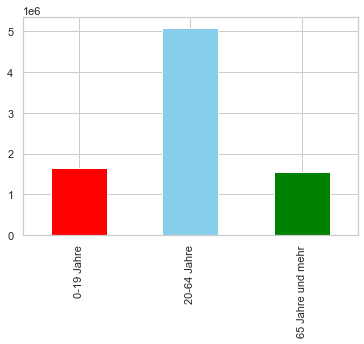

In [179]:
einwohner_verteilung_alter2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

In [175]:

einwohner_verteilung_alter2 = einwohner_verteilung_alter.sum(axis=0)
einwohner_verteilung_alter2

0-19 Jahre           1650440.0
20-64 Jahre          5087410.0
65 Jahre und mehr    1544170.0
dtype: float64

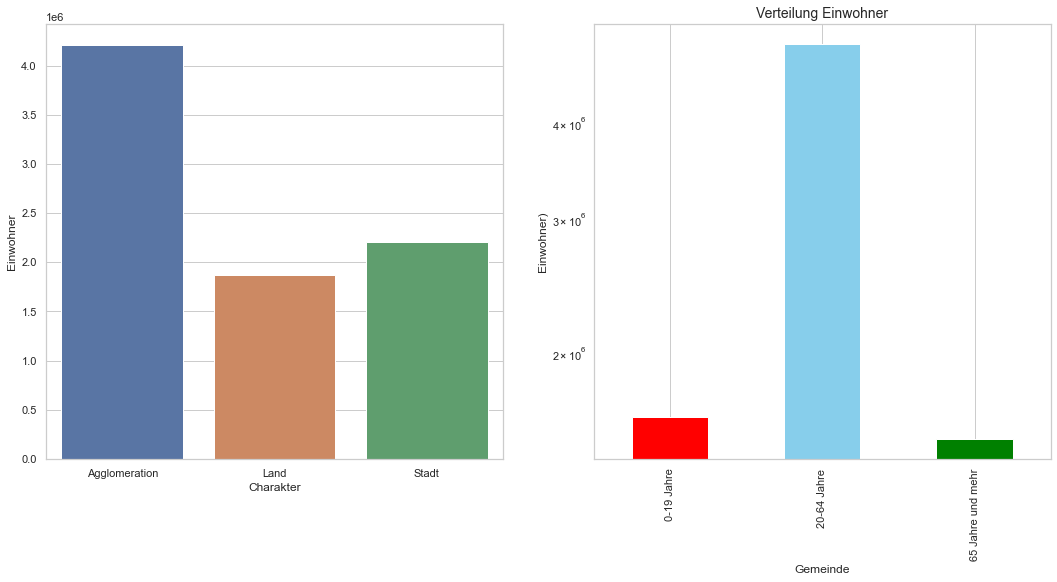

In [178]:
f= plt.figure(figsize=(18,8))
ax = f.add_subplot(121)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Charakter", y="Einwohner", data = einwohner_verteilung_charakter)
# ax.set_xlim(1,20000)
# ax.set_title('Verteilung Einwohner', size=14)
# plt.xlabel("Einwohnerzahl", size=12)
# plt.ylabel("Gemeinden", size=12)
# plt.axvline(x=gemeinden['Einwohner'].median(), color='blue', linestyle='dashed', label="Median")
# plt.axvline(x=gemeinden['Einwohner'].mean(),
#             color='red', linestyle='dashed', label="Mittelwert")
# plt.axvline(x=gemeinden['Einwohner'].quantile(0.25), color='green', linestyle='dashed', label="Q25%")
# plt.axvline(x=gemeinden['Einwohner'].quantile(0.75), color='green', linestyle='dashed', label="Q75%")
# labels = ["Median", "Mittelwert", "Quartile"]
# handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
#plt.legend(handles = handles[0:], labels = labels)

ax = f.add_subplot(122)
ax = einwohner_verteilung_alter2.plot(kind='bar', stacked=False, color=['red', 'skyblue', 'green'])
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Gemeinde", size=12)
plt.ylabel("Einwohner)", size=12)#, 'Altenquotient', 'Jugendquotient'
plt.yscale('log')

Text(0.5, 1.0, 'Verteilung log10(Sozialhilfequote)')

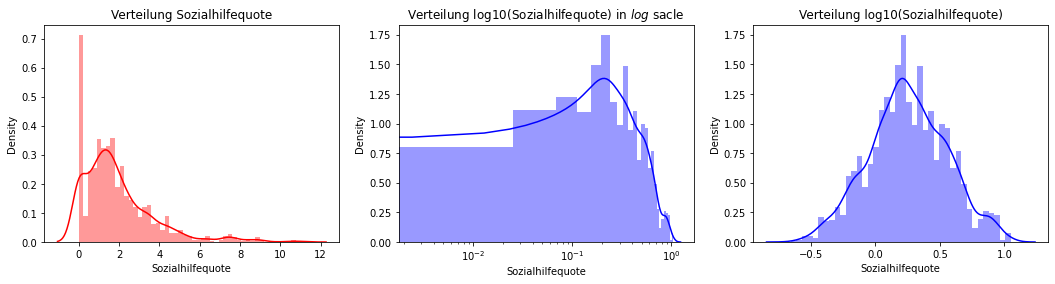

In [15]:

f= plt.figure(figsize=(18,4))

ax=f.add_subplot(131)
sns.distplot(gemeinden['Sozialhilfequote'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung Sozialhilfequote')

ax=f.add_subplot(132)
df = gemeinden[gemeinden['Sozialhilfequote'] > 0]
sns.distplot(np.log10(df['Sozialhilfequote']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Sozialhilfequote) in $log$ sacle')
ax.set_xscale('log');

ax=f.add_subplot(133)
sns.distplot(np.log10(df['Sozialhilfequote']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Sozialhilfequote)')


In [17]:
df['Sozialhilfequote'].describe()

count    2652.000000
mean        2.265871
std         1.706380
min         0.220000
25%         1.120000
50%         1.730000
75%         2.892500
max        11.210000
Name: Sozialhilfequote, dtype: float64

In [16]:
df['LogSozialhilfequote'] = np.log10(df['Sozialhilfequote'])
df['LogSozialhilfequote'].describe()

count    2652.000000
mean        0.250848
std         0.302697
min        -0.657577
25%         0.049218
50%         0.238046
75%         0.461273
max         1.049606
Name: LogSozialhilfequote, dtype: float64

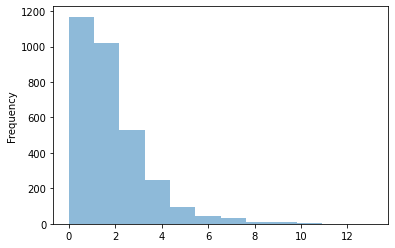

In [17]:
ax = gemeinden['Leerwohnungs-ziffer'].plot.hist(bins=12, alpha=0.5)
# ebenfalls rechtsschief --> log10 ob es nach normalverteilt aussieht...

Text(0.5, 1.0, 'Verteilung log10(Leerwohnungs-ziffer)')

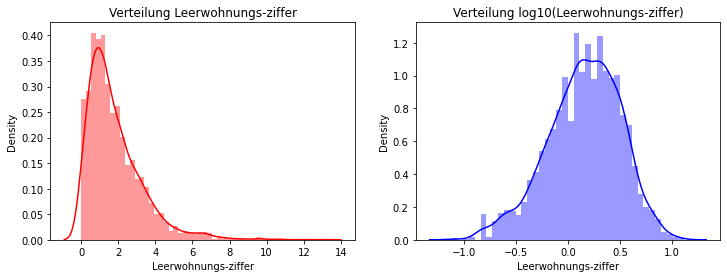

In [18]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(gemeinden['Leerwohnungs-ziffer'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung Leerwohnungs-ziffer')

ax=f.add_subplot(122)
df = gemeinden[gemeinden['Leerwohnungs-ziffer'] > 0]
sns.distplot(np.log10(df['Leerwohnungs-ziffer']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Leerwohnungs-ziffer)')
#ax.set_xscale('log');



In [19]:
print(gemeinden.shape)
gemeinden['Log_Sozialhilfequote'] = np.log(gemeinden['Sozialhilfequote'])
gemeinden['Log_Leerwohnungs-ziffer'] = np.log(gemeinden['Leerwohnungs-ziffer'])
gemeinden.shape

(3155, 56)


(3155, 58)

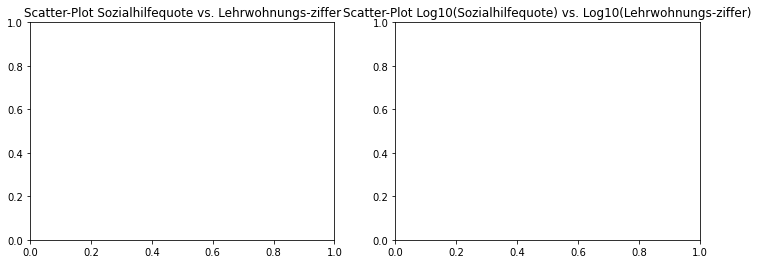

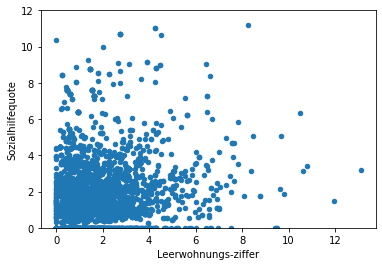

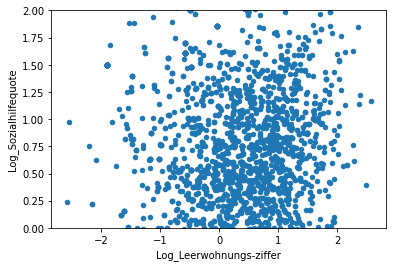

In [20]:
f= plt.figure(figsize=(12,4))
ax= f.add_subplot(121)
var = 'Leerwohnungs-ziffer'
data = pd.concat([gemeinden['Sozialhilfequote'], gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Sozialhilfequote', ylim=(0,12))
ax.set_title("Scatter-Plot Sozialhilfequote vs. Lehrwohnungs-ziffer");


ax= f.add_subplot(122)
var = 'Log_Leerwohnungs-ziffer'
data = pd.concat([gemeinden['Log_Sozialhilfequote'], gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Log_Sozialhilfequote', ylim=(0,2))
ax.set_title("Scatter-Plot Log10(Sozialhilfequote) vs. Log10(Lehrwohnungs-ziffer)");


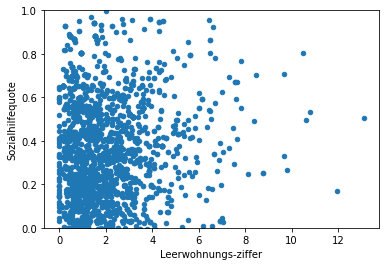

In [21]:
var = 'Leerwohnungs-ziffer'
data = pd.concat([np.log10(gemeinden['Sozialhilfequote']), gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Sozialhilfequote', ylim=(0,1));

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


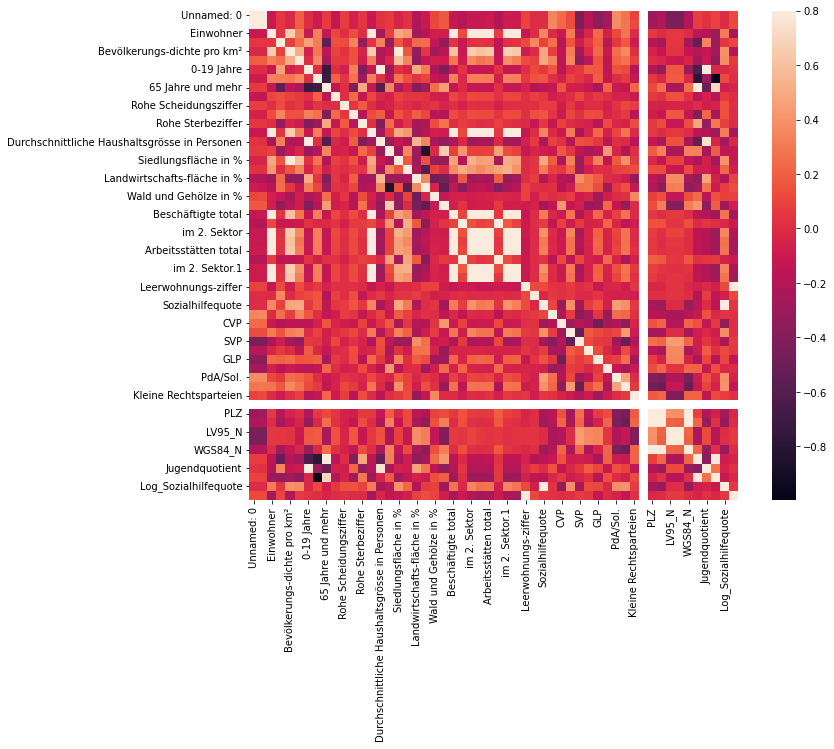

In [23]:
#correlation matrix
corrmat = gemeinden.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [24]:
matrix = gemeinden.corr()
print(matrix)

                                               Unnamed: 0  Gemeindecode  \
Unnamed: 0                                       1.000000      0.997154   
Gemeindecode                                     0.997154      1.000000   
Einwohner                                       -0.114106     -0.107428   
Veränderung in %                                 0.045809      0.048402   
Bevölkerungs-dichte pro km²                     -0.025537     -0.019777   
Ausländer in %                                   0.184711      0.196184   
0-19 Jahre                                       0.004967      0.001055   
20-64 Jahre                                     -0.092789     -0.094681   
65 Jahre und mehr                                0.059779      0.063910   
Rohe Heiratssziffer                             -0.131492     -0.133933   
Rohe Scheidungsziffer                            0.072562      0.074934   
Rohe Geburtenziffer                             -0.053618     -0.057817   
Rohe Sterbeziffer        

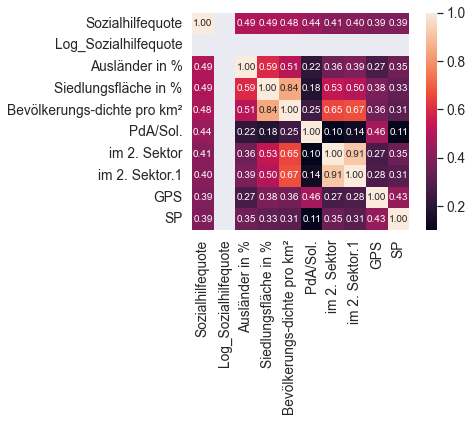

In [25]:
#sozialhilfequote correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sozialhilfequote')['Sozialhilfequote'].index
cm = np.corrcoef(gemeinden[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

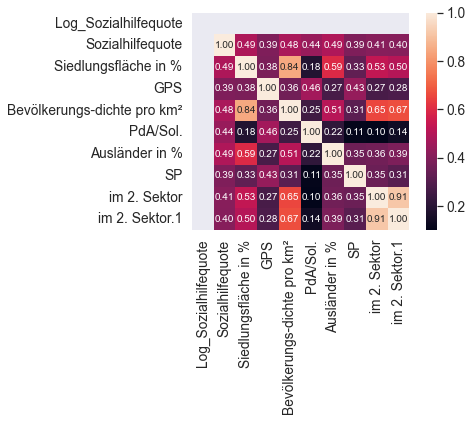

In [26]:
#sozialhilfequote correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Log_Sozialhilfequote')['Log_Sozialhilfequote'].index
cm = np.corrcoef(gemeinden[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()